In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sys

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append('..')
from utils import visualizing_colors
from utils import preprocessing_file
from utils.algorithm_least_squares import LeastSquares

In [3]:
MIN_NO_DIM = 1
MAX_NO_DIM = 10
NO_COLORS = 20
COMB_COLORS = 2
FILENAME = '01_ColorDimensionality'

#### Preprocessing file

In [4]:
file_experiment = f'../../../input/{FILENAME}.txt'
df = pd.read_csv(file_experiment, header=None, names=['left', 'right', 'slider'])

no_comb = NO_COLORS*(NO_COLORS-1)/2
assert df.shape[0] == no_comb
assert df.shape[1] == 3

In [5]:
df.head()

,left,right,slider
0,color_11,color_6,0
1,color_4,color_1,0
2,color_19,color_7,7
3,color_14,color_6,3
4,color_15,color_8,0


In [6]:
df_color = preprocessing_file.preprocess_two_colors(df, NO_COLORS)
df_color = preprocessing_file.adjust_slider(df_color, no_colors=2)
print(f'Dataframe shape: {df_color.shape}')

Dataframe shape: (190, 3)


In [7]:
df_color.head()

,left,right,slider
0,1,0,0.6
1,0,2,0.4
2,3,0,1.0
3,4,0,0.7
4,0,5,1.0


#### Set number of dimensions

In [8]:
NO_DIM = 2

In [9]:
least_squares = LeastSquares(NO_COLORS, NO_DIM, COMB_COLORS)
error, pos, dist = least_squares.run(df_color)
print('Done!')
print('f(%s) = %f' % (pos, error))

Done!
f([[ 92.55373727 104.50278575]
 [ 92.71460328 104.75700648]
 [ 92.8387919  104.68169799]
 [ 93.36498414 103.80381915]
 [ 93.37434026 104.48848673]
 [ 92.70915021 103.99640369]
 [ 92.98564391 103.76631473]
 [ 92.60423284 104.64159072]
 [ 93.71326625 104.34000286]
 [ 93.43609215 104.55180645]
 [ 92.63431831 104.57840677]
 [ 92.66855877 103.96382313]
 [ 92.83279078 104.48903568]
 [ 93.72882196 104.10466805]
 [ 93.46190542 104.06960654]
 [ 93.07078111 105.06649005]
 [ 93.56944378 104.73510334]
 [ 93.20812484 103.7169192 ]
 [ 92.57800614 104.8554505 ]
 [ 93.02672565 104.60401269]]) = 36.277162


In [10]:
dist_pred = least_squares.objective(pos, df_color.iloc[:, :-1].to_numpy())
dist_real = df_color.iloc[:, -1].to_numpy()
dict_dist = {'real': dist_real, 'estimated': dist_pred}
df_dist = pd.DataFrame(dict_dist)
df_dist.head()

,real,estimated
0,0.6,0.300842
1,0.4,0.336550
2,1.0,1.070829
3,0.7,0.820728
4,1.0,0.529694


Color 0 [-0.44619056 -0.25418182]
Color 1 [-0.50115543  0.04159667]
Color 2 [-0.35889338  0.07084884]
Color 3 [ 0.62391696 -0.2148667 ]
Color 4 [0.16512796 0.29343427]
Color 5 [ 0.01213911 -0.51971881]
Color 6 [ 0.37132527 -0.50035406]
Color 7 [-0.50357408 -0.11807983]
Color 8 [0.51458367 0.41508538]
Color 9 [0.16733473 0.38185267]
Color 10 [-0.43854615 -0.14393934]
Color 11 [ 0.00453935 -0.57121057]
Color 12 [-0.23226164 -0.07447556]
Color 13 [0.68604089 0.25313825]
Color 14 [0.51420688 0.0459021 ]
Color 15 [-0.45051964  0.51072218]
Color 16 [0.14043464 0.60692331]
Color 17 [ 0.56802295 -0.38525538]
Color 18 [-0.66824898  0.02086628]
Color 19 [-0.16828253  0.14171214]


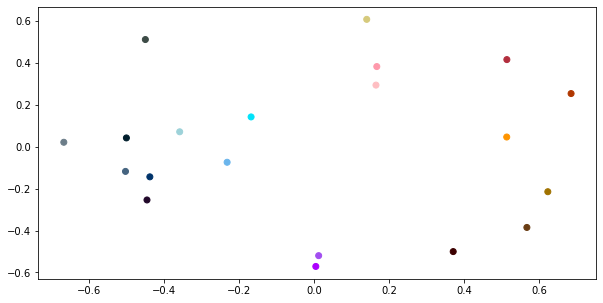

In [11]:
visualizing_colors.embedding(pos, NO_DIM)

In [12]:
NO_DIM = 4

In [13]:
least_squares = LeastSquares(NO_COLORS, NO_DIM, COMB_COLORS)
error, pos, dist = least_squares.run(df_color)
print('Done!')
print('f(%s) = %f' % (pos, error))

Done!
f([[0.82093624 0.80729759 0.81385859 0.53128667]
 [0.9368354  0.81194673 0.5677848  0.33122717]
 [0.6409998  1.01611336 0.45120696 0.55281595]
 [0.71954405 0.03894767 0.18127877 0.5133887 ]
 [0.05292082 0.65561162 0.41490108 0.59533089]
 [0.07556348 0.71813588 0.27907767 0.17487991]
 [0.95122522 0.26381428 0.46551898 0.14668374]
 [0.76694125 1.0237216  0.59240472 0.42093332]
 [0.0558187  0.37153058 0.87217107 0.45384747]
 [0.03638935 0.64237587 0.35868688 0.6875007 ]
 [0.8426677  0.94289073 0.54804108 0.51424415]
 [0.0625719  0.75872257 0.21027345 0.1793183 ]
 [0.5251619  0.94670501 0.34737806 0.44255198]
 [0.28390889 0.12890943 0.90568213 0.32071401]
 [0.42345003 0.11591075 0.32016026 0.59909336]
 [0.87455801 0.6062712  0.8159601  0.88162377]
 [0.51034226 0.28725522 0.20686221 0.89731895]
 [0.76428439 0.07099491 0.45585154 0.13767912]
 [0.81310781 0.95022719 0.79716536 0.20688738]
 [0.51467319 0.93029319 0.27336551 0.65407388]]) = 16.745106


In [14]:
dist_pred = least_squares.objective(pos, df_color.iloc[:, :-1].to_numpy())
dist_real = df_color.iloc[:, -1].to_numpy()
dict_dist = {'real': dist_real, 'estimated': dist_pred}
df_dist = pd.DataFrame(dict_dist)
df_dist.head()

,real,estimated
0,0.6,0.337684
1,0.4,0.456027
2,1.0,1.000560
3,0.7,0.880980
4,1.0,0.988204


Color 0 [0.40062872 0.13699662]
Color 1 [0.42165274 0.1844089 ]
Color 2 [ 0.36812473 -0.20472394]
Color 3 [-0.38422235  0.43548472]
Color 4 [-0.27406083 -0.41009307]
Color 5 [-0.24082932 -0.428722  ]
Color 6 [-0.00687698  0.54453873]
Color 7 [ 0.48305937 -0.07899132]
Color 8 [-0.38562283 -0.12007683]
Color 9 [-0.30714226 -0.43212414]
Color 10 [0.45792141 0.01243041]
Color 11 [-0.23329606 -0.47879418]
Color 12 [ 0.22199261 -0.25646876]
Color 13 [-0.42163456  0.22092348]
Color 14 [-0.47706596  0.19100041]
Color 15 [0.27985316 0.27961306]
Color 16 [-0.32044036  0.09687964]
Color 17 [-0.26979873  0.53217959]
Color 18 [0.50207562 0.06050678]
Color 19 [ 0.18568185 -0.28496812]


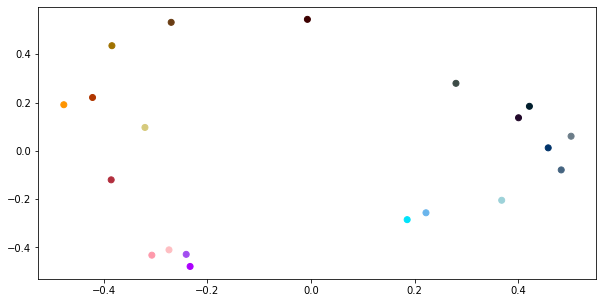

In [15]:
visualizing_colors.embedding(pos, NO_DIM)

#### Iterate number of dimensions

No dim 1 with score: 73.42999651593945
No dim 2 with score: 36.27716195491883
No dim 3 with score: 19.599446824233215
No dim 4 with score: 16.745106365825798
No dim 5 with score: 15.75456816565444
No dim 6 with score: 15.370626127950374
No dim 7 with score: 15.31482455134552
No dim 8 with score: 15.301252551049595
No dim 9 with score: 15.30129684196188


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

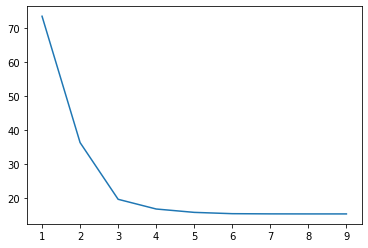

In [16]:
score_s = []
for no_dim in range(MIN_NO_DIM, MAX_NO_DIM):
    least_squares = LeastSquares(NO_COLORS, no_dim, COMB_COLORS)
    score, _, _ = least_squares.run(df_color)
    print(f'No dim {no_dim} with score: {score}')
    score_s.append([no_dim, score])
score_s = np.array(score_s)
fig, axs = plt.subplots()
axs.plot(score_s[:, 1])
plt.locator_params(axis='x', nbins=MAX_NO_DIM-MIN_NO_DIM)
labels = np.arange(0, MAX_NO_DIM)
axs.set_xticklabels(labels)

In [17]:
df = pd.DataFrame(score_s, columns=['dim', 'loss'])
# df.to_csv(f'output/{FILENAME}.csv', index=False)